# Логистическая регрессия
Логистическая регрессия позволяет предсказывать значения категориальной переменной на основе исторических данных. Целевая категориальная переменная может принимать два или более дискретных значений(классов).

Пример - указать для картинки один из классов:
* Класс 0: изображение автомобиля
* Класс 1: изображение улицы
* Класс 2: изображение моста

Непрерывные переменные можно перевести в дискретные с помощью диапазонов:
* Класс 0: цена дома 0-100к долл.
* Класс 1: цена дома 100-200к долл.
* Класс 2: цена дома > 200к долл.

**Важно: такое преобразование будет действовать только в одну сторону!** Можно преобразовать непрерывную переменную в категориальную, однако обратное преобразование невыполнимо(если нет исходных данных с непрерывными значениями). 

Зачастую, алгоритмы на выходе выдают **вероятность** принадлежности тому или иному классу:
* Класс 0: вероятность 10%
* Класс 1: вероятность 85%
* Класс 2: вероятность 5%

## Логистическая функция

Логистическая регрессия получается преобразованием линейной регрессии в модель классификации с помощью логистической функции:$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
Эту функцию также называют сигмоид-функцией.

На графике логистическеая функция выглядит следующим образом:

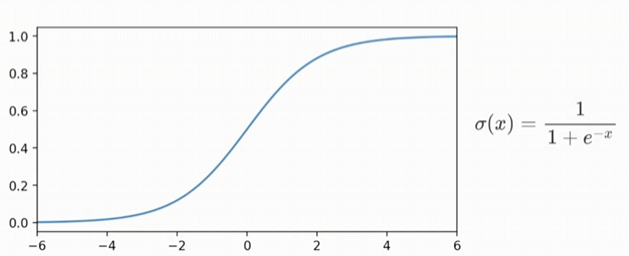

**Замечание: есть целое семейство логистических функций:**

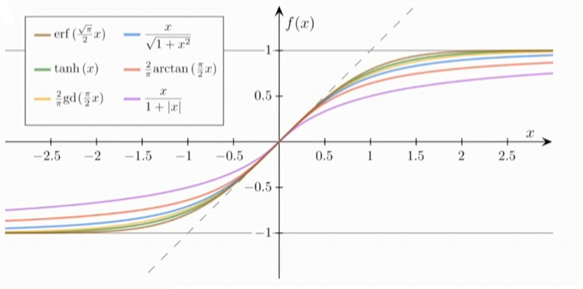

Для очень маленьких значений - эта функция приближается к нулю, а для очень больших значений - функция приближается к единице. При этом для любых значений x - эта функция возвращает значения в диапазоне от нуля до единицы.

В итоге, эта функция применима для многих задач, в которых есть какие-либо естественные ограничивающие факторы, из-за которых дальнейший рост той или иной переменной замедляется.

## Переход от линейной модели к логистической

Как можно перевести модель линейной регрессии для задач регрессии в логистическую модель для задачи классификации? Представим набор данных с одним признаком "доход в прошлом году" и одной целевой переменной "невыполнение кредита". Такие данные могут выглядеть следующим образом:

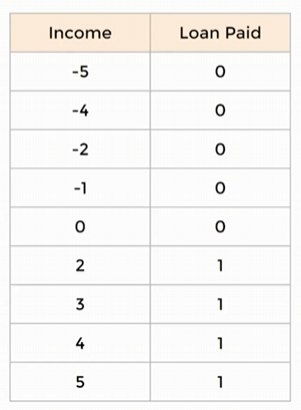

Здесь мы видим доход за прошлый год - причём как положительные, так и отрицательные значения. В данном случае отрицательные значения означают то, что человек за прошлый год снял со счетов больше, чем положил на них. Вторая колонка принимает два значения, где: 1 - просрочек по кредиту не было, 0 - просрочки по кредиту были.  
Мы можем наблюдать четкую зависимость между этими двумя переменными: если доход отрицательный - просрочки по кредиту были, а если доход положительный - просрочек не было.

Для начала построим график для этих двух переменных:

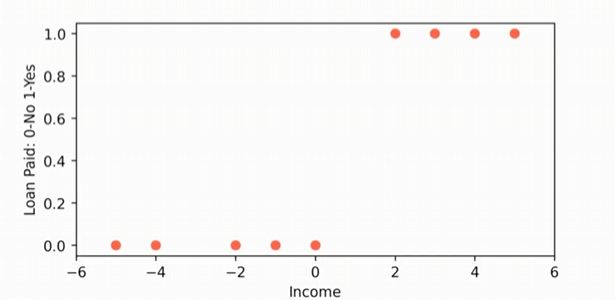

Здесь переменная Loan Paid принимает всего два значения 0 и 1. Также мы видим, что люди с отрицательным значением дохода - допускают просрочки по кредиту.

Представим, что для нового человека мы хотим сделать предсказание - будут ли у него просрочки по кредиту или нет. Т.е. мы знаем его доход за предыдущий год и хотим построить модель, которая будет предсказывать наличие или отсутствие просрочек по кредиту.

В таком случае лиейная модель возращала бы не значения 0 и 1, а значения между ними. Мы можем применить логистическую функцию:

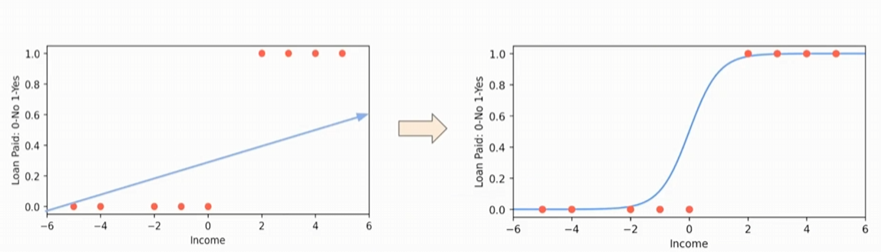

С её помощью мы выполним некоторое преобразование и в итоге мы преобразуем линейную регрессию в логистическую.

Мы будем интерпретировать значения по оси Y как вероятность того, что точка принадлежит к тому или иному классу:

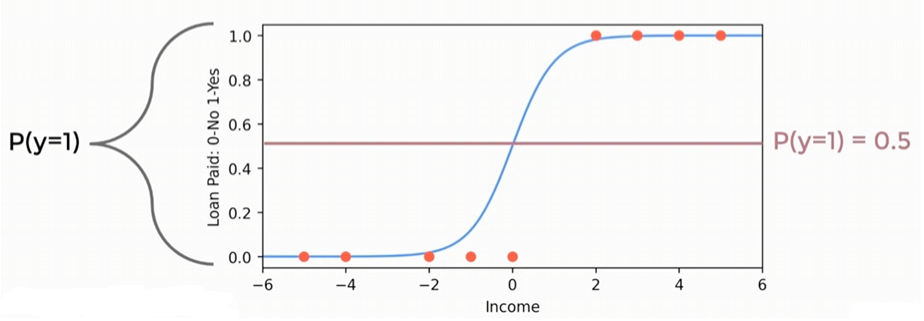

Также мы возьмём значение 0,5 и будем считать его некоторым пороговым значением. Т.е. мы будем находить такую функцию, которая наиболее близко проходит около наших точек. Как только мы построим такую функцию, то далее, с помощью этой функции, можно будет для любого значения X получить соответствующее значение y.

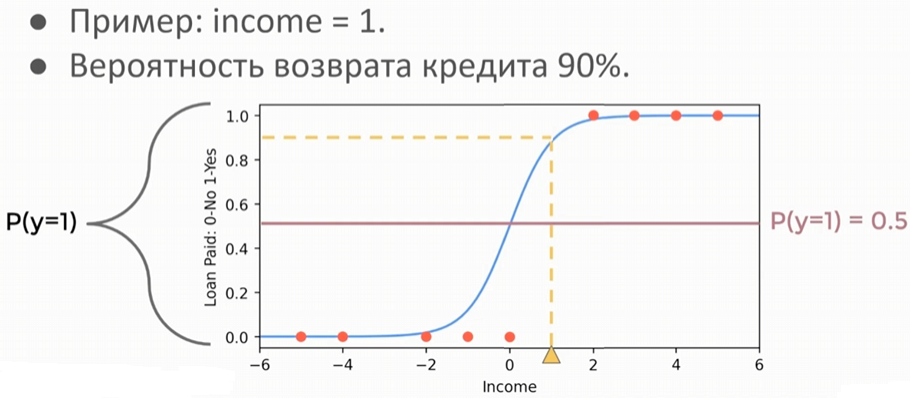

Здесь - все значения выше 0,5 будут относиться к классу 1, все что ниже - к классу 0.

## Математика перехода

Мы знаем уравнение линейной регрессии: $$ \hat{y} = \beta_0x_0 + ... + \beta_nx_n $$ или же $$\hat{y} = \sum_{i=0}^{n} \beta_i x_i$$

Также, знаем логистическую функцию, которая для любого значения возвращает число от 0 до 1: $$\sigma(x) = \frac{1}{1 + e^{-x}}$$


Все что нам нужно сделать - подставить уравнение линенйой регрессии в логистическую функцию, и мы получим логистическую регрессию

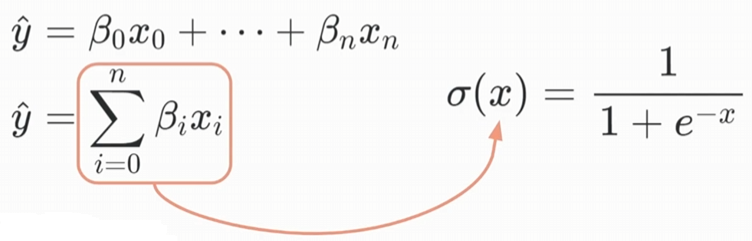

В терминах логистической функции, можно сказать слудющее: $$ \hat{y} = \sigma(\beta_0x_0 + ... + \beta_nx_n) $$ или же $$\hat{y} = \sigma(\sum_{i=0}^{n} \beta_i x_i)$$

Более полная формула для логистической регрессии: $$\hat{y} = \frac{1}{1 + e^{-\sum_{i=0}^{n} \beta_i x_i}}$$

Как в этой функции интерпретировать коэффициенты $\beta$ с точки зрения их влияния на $\hat{y}$?

Нам понадобится некоторый термин "odds"(шансы). Это соотношение вероятности того, состоится то или иное событие или не состоится. Шансы некоторого события, которое может произойти с вероятностью $p$ определяется как соотношение того, что это событие произойдёт делённое на вероятность того, что это событие не произойдёт: $$\frac{p}{1-p}$$

Для события, возникающего с вероятностью 50% получаем: $$\frac{0,5}{1-0,5} = \frac{0,5}{0,5}$$ - это то же самое, что 1/1 - **шансы 1 к 1**.

Можно переписать формулу ниже так, чтобы показать что это эквивалентно логарифму шансов в виде линейной комбинации признаков:$$\hat{y} = \frac{1}{1 + e^{-\sum_{i=0}^{n} \beta_i x_i}}$$

Это позволит решить нам это уравнение для коэффициентов и признаков $x$ в терминах логарифмов шансов(log odds):
$$\hat{y} + \hat{y}e^{-\sum_{i=0}^{n} \beta_i x_i} = 1$$
$$\hat{y}e^{-\sum_{i=0}^{n} \beta_i x_i} = 1 - \hat{y}$$
$$\frac{\hat{y}}{1-\hat{y}} = e^{\sum_{i=0}^{n} \beta_i x_i}$$
$$\ln(\frac{\hat{y}}{1-\hat{y}}) = \sum_{i=0}^{n} \beta_i x_i$$

Как будет выглядеть функция в терминах логарифма шансов(log odds)?

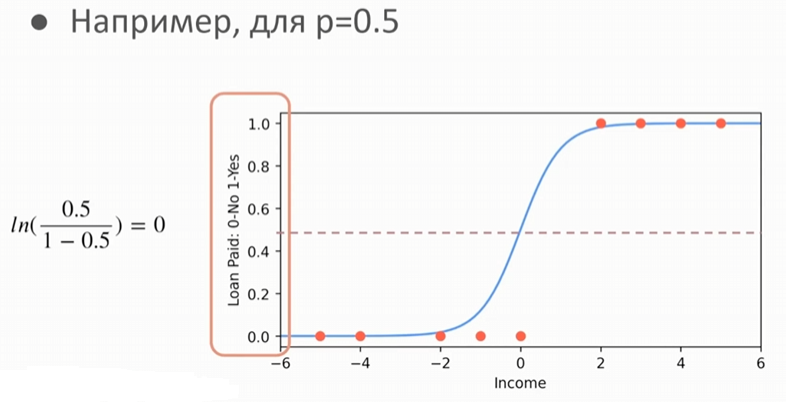

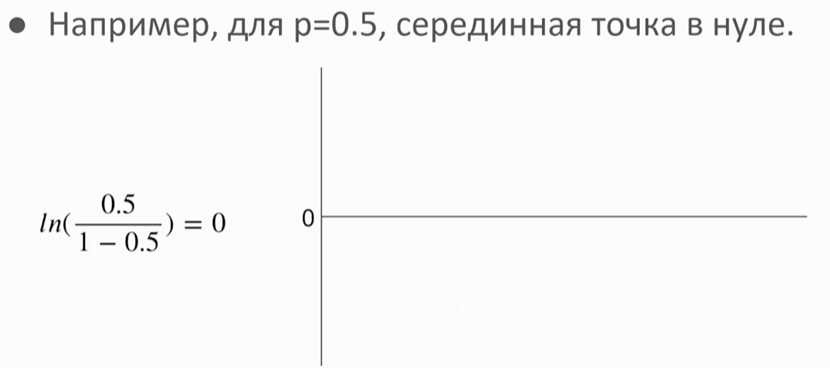

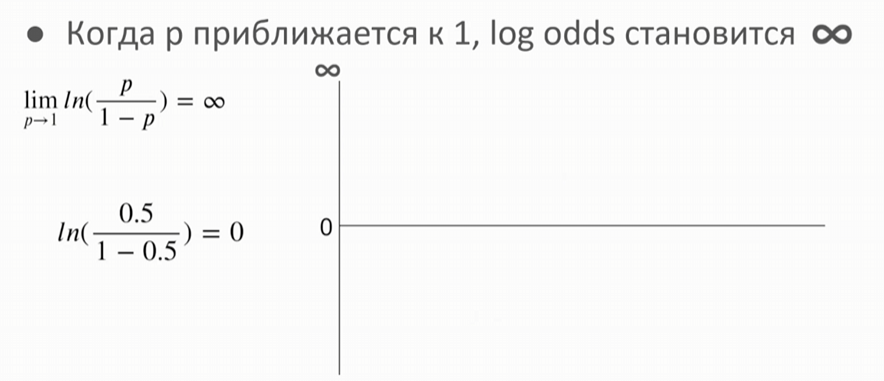

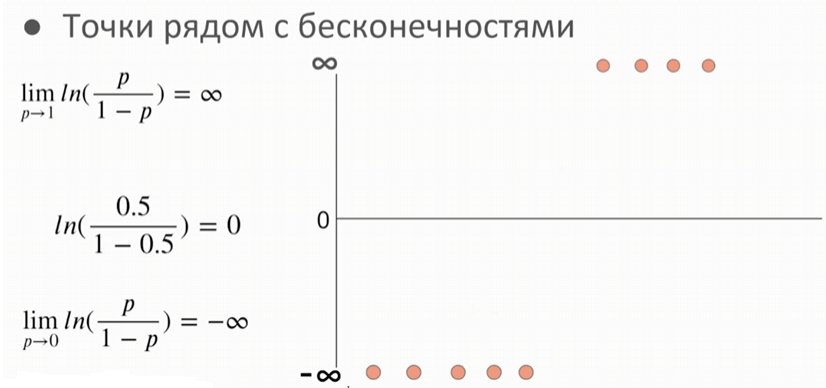

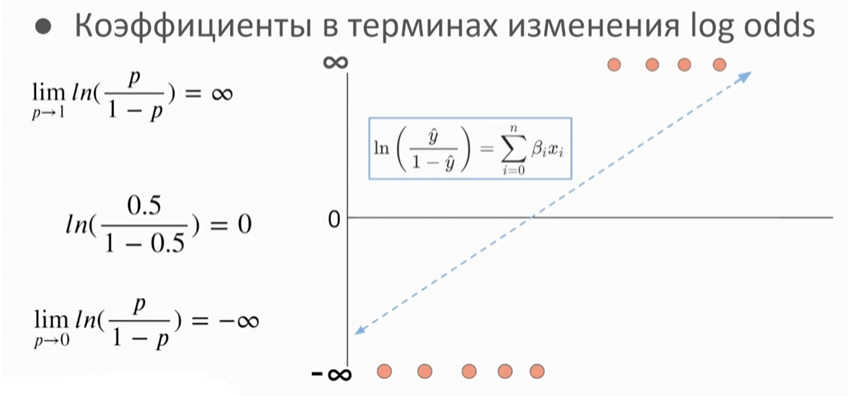
Коэффициенты $\beta$ в таком случае можно интерпретировать как изменение log odds. Причем значения на графике меняются от $-\infty$ до $+\infty$ с серединой в нулевом значении. По сути мы взяли кривую логистической функции и преобразовали её в прямую линию, но чтобы это сделать по вертикальной оси был отложен не $\hat{y}$, а log odds.

Поскольку шкала для log odds не является линейной, коэффициенты $\beta$ нельзя понимать как "увеличение на одну единицу", как это было для линейной регрессии.

Но можно сдлеать некоторые выводы:
1. Знак коэффициента:
   * Положительные $\beta$ означают увеличение вероятности принадлежности к классу 1 при увеличении признака $x$
   * Отрицательные $\beta$ означают уменьшение вероятности принадлежности к классу 1 при увеличении признака $x$
2. Величина коэффициента:
   * Сложно интерпретировать напрямую, особенно когда у нас есть и непрерывные, и дискретные признаки
   * Можно сравнивать величины коэффициентов между собой используя так называемые **odds ratio**
   * Таким образом можно определить, какие признаки больше влияют на результат предсказания

## Поиск графика

Как найти такую логистическую функцию, которая лучше всего соответствует имеющемуся набору точек?

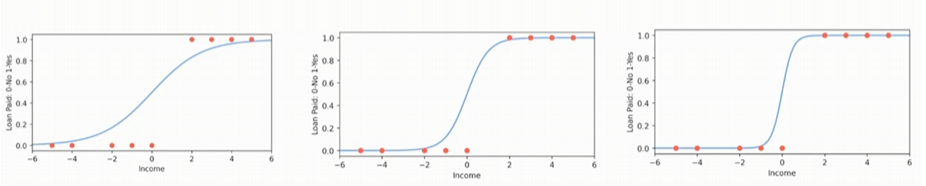

Для линейной регрессии мы минимизировали сумму квадратов остатков(RSS). В случае log odds значения близятся к бесконечности, и RSS здесь не подходит. Мы будем использовать метод максимального правдоподобия.

Первый шаг метода максимального правдоподобия - перейти от log odds обратно к вероятностям

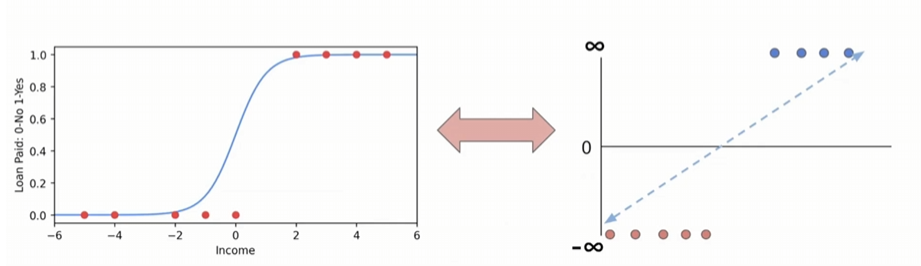

В итоге мы получим значения для $\hat{y}$, которые меняются от 0 до 1 и определяют вероятность принадлежности к классу 1.
$$ln(\frac{p}{1-p}) = ln(odds)$$
$$\frac{p}{1-p} = e^{ln(odds)}$$
$$p = (1-p)e^{ln(odds)}$$
$$p = e^{ln(odds)} - pe^{ln(odds)}$$
$$p + pe^{ln(odds)} = e^{ln(odds)}$$
$$p(1 + e^{ln(odds)}) = e^{ln(odds)}$$
$$p = \frac{e^{ln(odds)}}{(1 + e^{ln(odds)})}$$

Это уравнение позволяет нам взять некоторое значение в терминах log odds и напрямую получить вероятность принадлежности к классу 1.

Так, на правом графике:

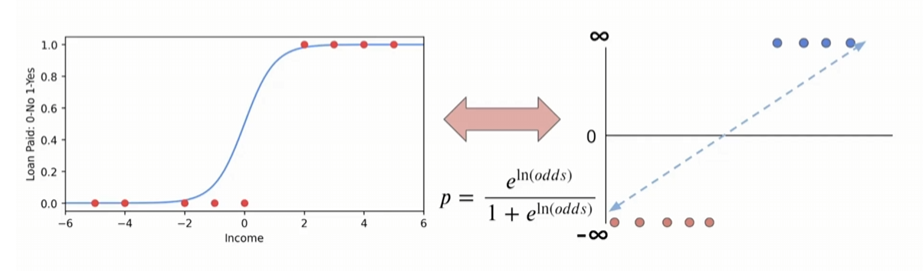

Мы можем взять любое значение по оси y, которое измеряется в терминах log odds, подставить его в полученную формулу и получить значение по оси y на левом графике.

Ось x одинаковая на обоих графиках - это доход человека за прошлый год.

Такой переход понадобится для определения метода максимального правдоподобия.

Допустим, мы нарисовали некоторую начальную линию на графике в терминах log odds.

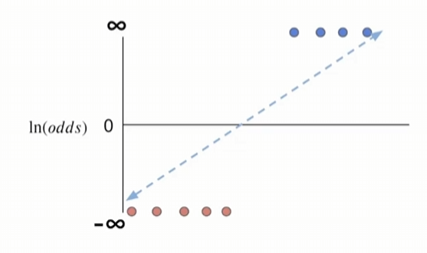

Этой линии соответствует некоторая логистическая функция на исходном графике:

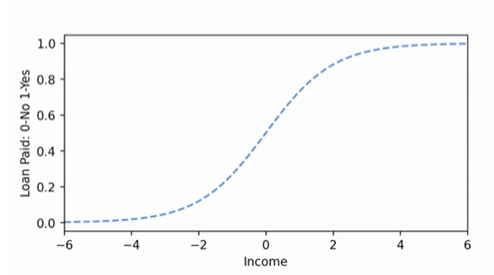

Так как на первом графике мы не можем вычислить сумму квадратов ошибок(потому что для синих и красныз точек, значения по оси y уходят к бесконечности), то мы можем спроецировать эти точки на линию, после чего мы полуим значения по вертикальной оси, которые отличаются от $\pm\infty$:

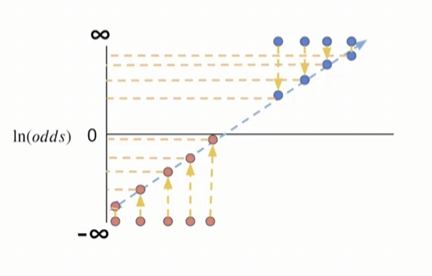

Это значит, что мы можем вычислить значение log odds для этих точек, после чего перевести эти значения в вероятности p на следующем графике уже для логистической регрессии: 

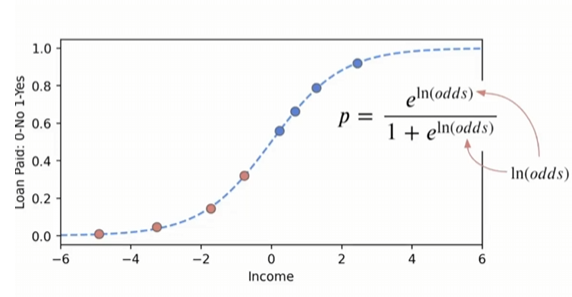

На этом графике, все значения по оси y выражены в терминах вероятности.

Как мог бы выглядеть график, который идеально проходит через все точки?

Такой график принимал бы значение 1 для синих точек и значение 0 для красных точек. Эти точки, по сути, являются теми точками на которых выполняется обучение модели с целью нахождения наилучшего графика.

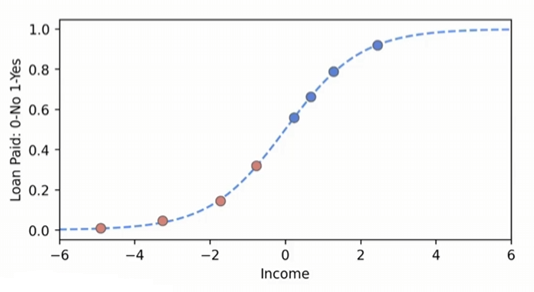

Для поиска наилучшего графика будет использоваться термин - правдоподобие. Оно вычисляется как произведение вероятности того, что та или иная точка принадлежит к нужному классу(для синих точек - класс 1, для красных - 0).

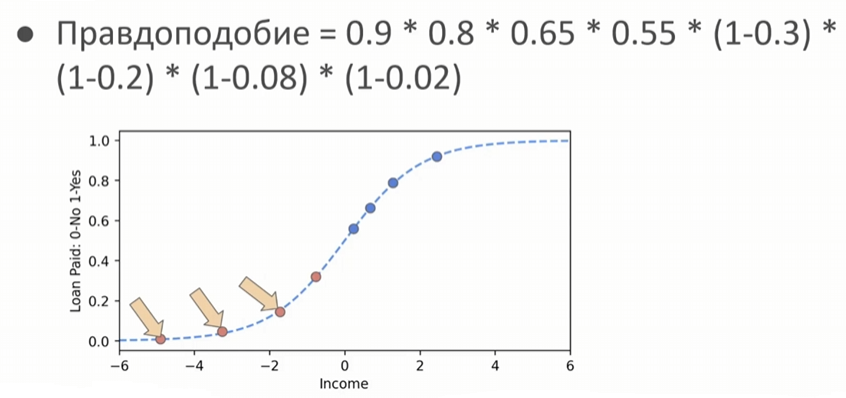

Максимально возможное значение для такого выражения равно единице, но в жизни мы получим чуть меньшее значение. На практике максимизируют не сами вероятности, а натуральный логарифм от этих вероятностей, так как математически они более удобны для градиентного спуска.

Задача в том, чтобы найти такие коэффициенты $\beta$, которые максимизируют значение правдоподобия.

Хотя здесь мы ищем максимум правдоподобия, нам нужно будет какое-то выражение, которое мы будем минимизировать, потому что градиентный спуск ищет минимумы, а не максимумы.

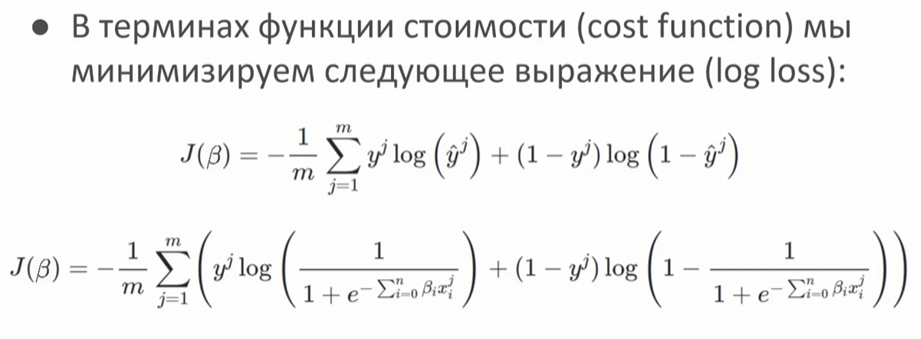

Именно такую формулу будет минимизировать алгоритм, когда будет выполнять градиентный спуск для поиска оптимальных коэффициентов $\beta$.

# Метрики оценки для модели классификации

## Матрица ошибок
Такая матрица применима для любых задач бинарной классификации.

Представим, что модель должна предсказывать наличие/отсутствие заболевания на основе некоторых биологических признаков. Эту задачу можно рассмотреть как задачу логистической регрессии, в которой:
* 0 - заболевания нет(тест отрицательный)
* 1 - заболевание есть(тест положительный)

Однако, вряд ли модель будет работать идеально во всех случаях. Поэтому возможны 4 варианта:
* <span style="color:green">Здоровый человек - тест отрицательный</span>
* <span style="color:green">Заболевший человек - тест положительный</span>
* <span style="color:red">Здоровый человек - тест положительный</span>
* <span style="color:red">Заболевший человек - тест отрицательный</span>

На основе этих четырёх случаев можно рассчитать некоторые метрики. Расположим их в виде матрицы.

Речь будет идти об **обучающем наборе данных**, когда мы знаем значения не только признаков, но и целевой переменной. 

**По колонкам** - отложено фактическое состояние пациента. **По строкам** - откладываются результаты теста или модели. Таким образом, получается матрица размером 2x2. 

Если пациент болеет, а также модель указывает на то, что он болеет - то есть тест положительный - такой вариант называется **True Positive**, т.е. наша модель правильно указала значение 1. Если пациент здоров и модель говорит что он здоров - то есть тест отрицательный - такой вариант называется **True Negative**, т.е. модель правильно указала значение 0. **Эти два результата мы хотим максимизировать.**

Теперь, представим что пациент не болеет, но модель вернула положительный результат - посчитав его больным - такой вариант называется **False Positive**, мы ошибочно выдаем положительный результат теста, хотя пациент здоров. Если пациент болен, но модель возвращает отрицательный результат - посчитав его здоровым - такой вариант называется **False Negative**, мы ошибочно выдаем отрицательный результат, хотя пациент болен. **Эти два результата мы хотим минимизировать.**

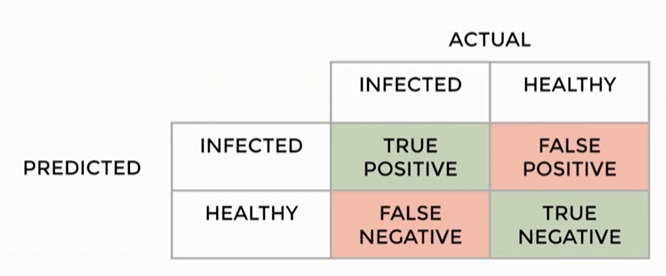

Представим группу из 100 человек - из них 5 заболевших и 95 здоровых(**Важно: мы знаем кто действительно болеет, а кто здоров!**). Для них мы провели тесты и получили следующие результаты:

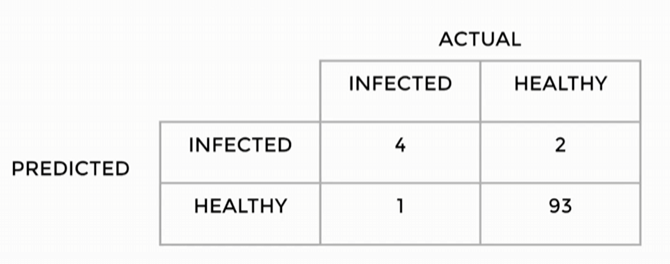

С помощью этих чисел можно вычислять различные метрики.

## Метрика Accuracy
**Accuracy** - доля правильно классифицированных объектов. Эта метрика отвечает на вопрос - как часто модель дает правильное предсказание.

Для ответа на этот вопрос используется следующая формула: $$Acc = (TP+TN)/Total$$
$$(4 + 93)/100 = 97%$$
Наколько такой результат можно считать хорошим?

### Парадокс Accuracy

Представим, что модель **всегда** говорит, что пациент здоров. В таком случае, матрица будет выглядеть следующим образом:

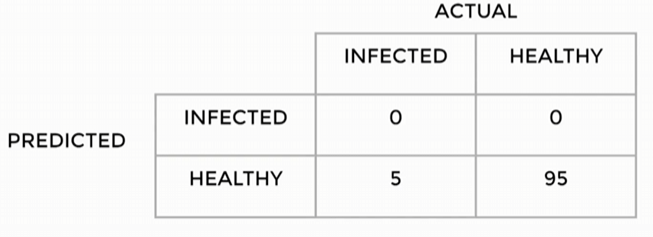

Если вычислить метрику Accuracy для такой модели, то можно получить следующее значение: $$(0 + 95)/100 = 95%$$
В 95% случаев, модель была права - это получилось благодаря тому, что изначально классы *болеет* и *здоров* очень несбалансированы, поэтому была получена метрика Accuracy 95% для модели, которая однозначно не правильная, так как она всегда возвращает результат - пациент здоров вне зависимости от результатов теста.

**В этом и состоит парадокс accuracy!**
* Если классы **несбалансированы**, то любой классификатор столкнётся с проблемой парадокса accuracy
* **Несбалансированные** классы всегда приводят к искажённым(завышенным) результатам

Если один из двух классов имеет небольшой процент n%, то модель, предсказывающая "основной" класс, будет иметь:$$Accuracy = (1-n)$$
В нашем примере было только 5% заболевших, поэтому accuracy модели "все здоровы" была 95%.

Это значит, что полагаться только на метрику accuracy(доля правильно классифицированных объектов) - нельзя.

## Recall(полнота / sensitivity - чувствительность)
Эта метрика отвечает на вопрос - когда фактический результат actual положителен, как часто модель права?

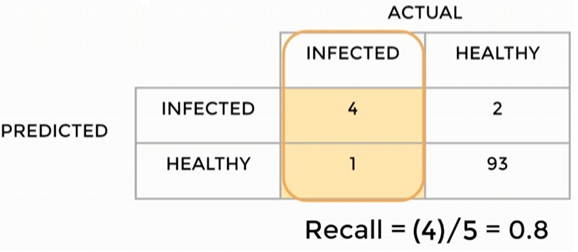

$$(TP)/Total Actual Positives$$
$$(4) / 5 = 0.8$$

По сути метрика Recall - отвечает на вопрос - из всех положительных случаев, какой процент этих случаев был обноружен? В нашем примере было 5 случаев и наша модельобнаружила 80% из них

Теперь вернёмся к неправильной модели, которая на выходе всегда говорит что пациент здоров:

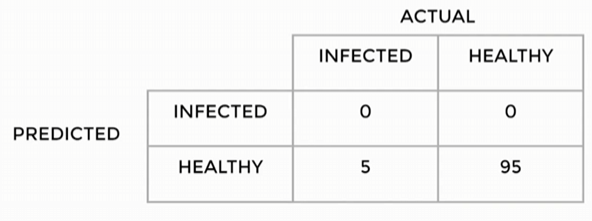

Для этой модели метрика Accuracy была равна 95%. Что получится с метрикой Recall в таком случае?
$$(0) / 5 = 0$$
В таком случае значение метрики Recall = 0 предупреждает нас о том, что модель не может правильно определить ни одного из положительных случаев.  

**Эта метрика является особо полезной для тех моделей, которые оказались переобучены, которые как раз и отдают больший приоритет тому классу, где больше всего измерений.**

## Precision(точность)
Когда предсказание положительно, как часто модель права?

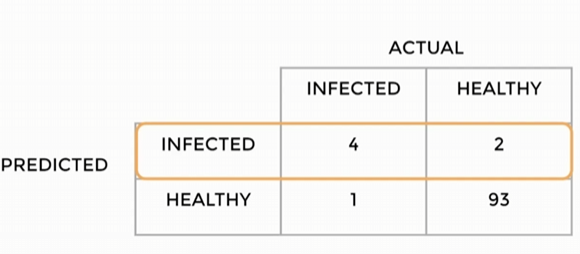

$$(TP)/Total Predicted Positives$$
$$(4) / 6 = 0.66$$

Чтобы оценить работу этой метрики снова вспомним пример с неправильной моделью:

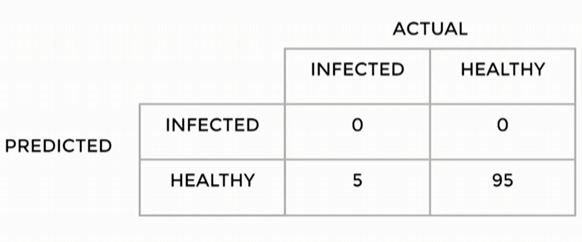

$0/0$

Так что если метрика Precision принимает такое неопределённое значение, то это также является предупреждением о том, что с моделью что-то не так.

Метрики Recall и Precision не подвержены тому порадоксу, который существует для метрики Accuracy. Они помогают оценить работу модели именно для положительных случаев.

**Важно: в зависимости от модели, очень часто между этими двумя метриками нужно искать некоторый баланс.**

## Метрика F1-score

Поскольку метрики Precision и Recall связаны между собой общим числителем $(TP)$, мы можем также посчитать F1-score по следующей формуле гармонического среднего: $$F = \frac{2*precision*recall}{precision+recall}$$

**Среднее гармоническое отличается от обычного среднего значения тем, что если хотя бы одна из двух метрик равна нулю, то вся результирующая метрика тоже равна нулю.**

В итоге мы получаем метрику в виде одного числа, которая говорит нам - насколько наша модель хорошо работает. Поэтому, если мы увидим, что она равна нулю - значит: либо precision, либо recall, либо обе эти метрики равны нулю.

### ВАЖНО: существует множество других метрик, которые также вычисляются на основе матрицы ошибок

## ROC-кривые

Также можно почитать [статью](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)

На графике по горизонтали откладывается False Positive Rate, по вертикали - True Positive Rate. Основная идея этого графика в том, что существует некоторый баланс между истинно положительными и ложно положительными случаями. Эта кривая строится на основе матрицы ошибок.

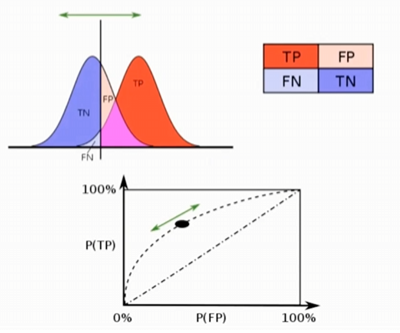

Вернёмся к примеру с пациентами:

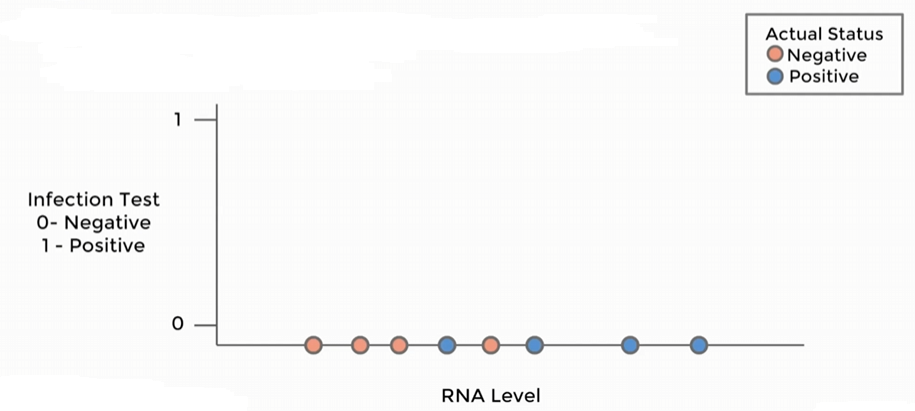

У нас есть два класса:
* 0 - результат теста о том, что пациент здоров
* 1 - результат теста о том, что пациент болен

Также, кроме результатов тестов, для обучающих данных мы знаем истинные значения. Синими точками обозначеные действительно болеющие люди, красными - здоровые.

Далее, на этих обучющих данных происходит обучение модели логистической регрессии:

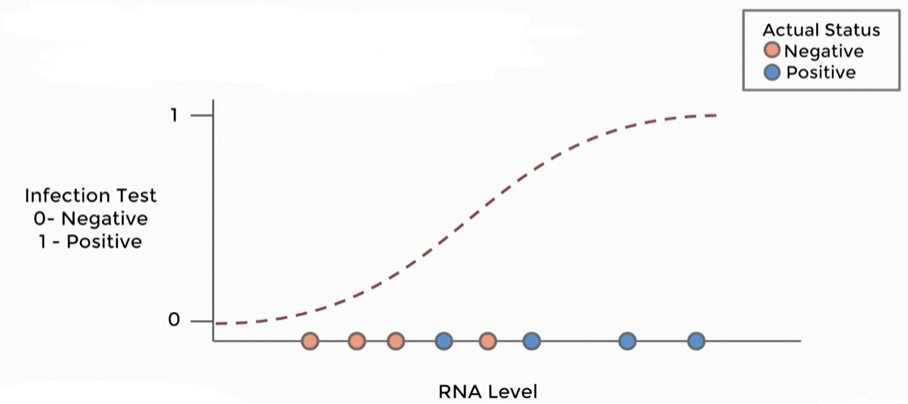

Представим, что на входе мы подаём значение признака x - в данном примере это некоторый анализ, для него мы можем вернуть значение либо 0, либо 1.   
По умолчаню, возьмём пороговое значение = 0,5. Все что будет выше этого значения - будем считать как принадлежность к классу 1, всё что ниже 0,5 - как принадлежность к классу 0:

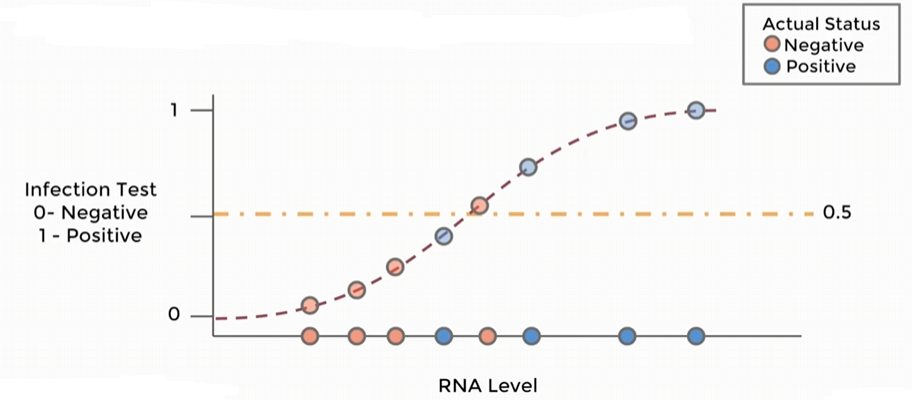

Сколько истинно положительных и ложно положительных значений находится на этом графике? 

Верхние три синие точки - это True Positive, потому что это заболевшие люди и модель правильно идентифицирует их(точки находятся выше линии 0,5). Три карсные точки внизу - это True Negative - это здоровые люди и модель правильно идентифицирует их(точки находятся ниже линии 0,5).

Но есть одна точка, которая является отрицательным результатом, но модель индетифицирует её как положительный результат - это False Positive:

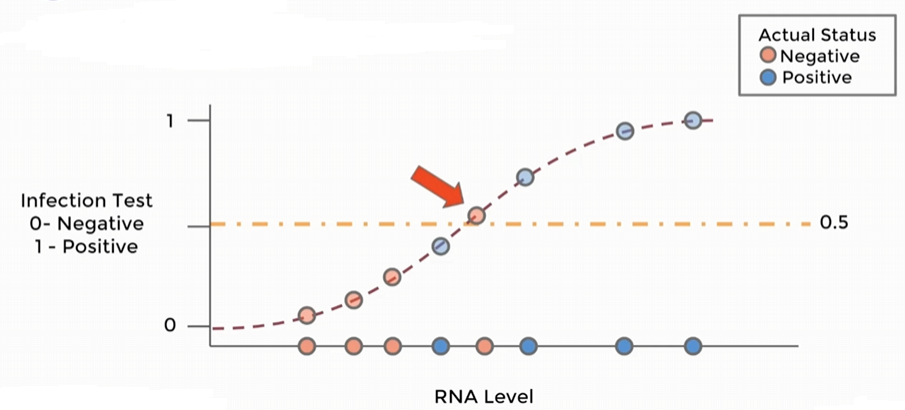

И есть точка, которая является положительным случаем, но модель идентифицирует её как отрицательный результат - это False Negative:

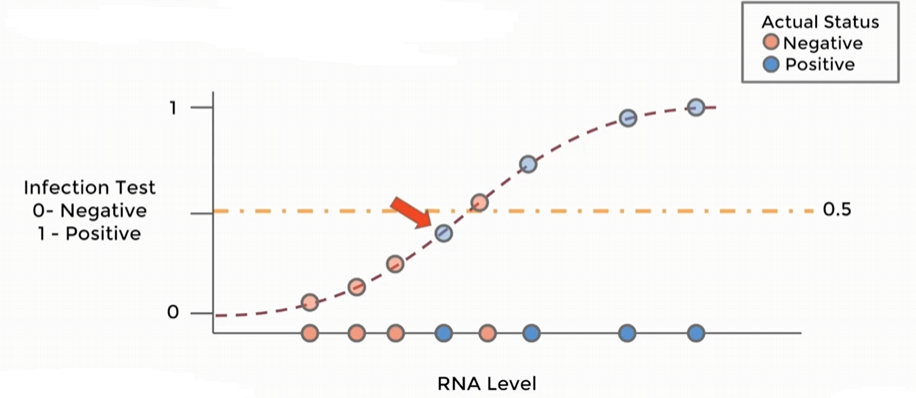

Что будет, если установить пороговую линию на отметке 0,4?

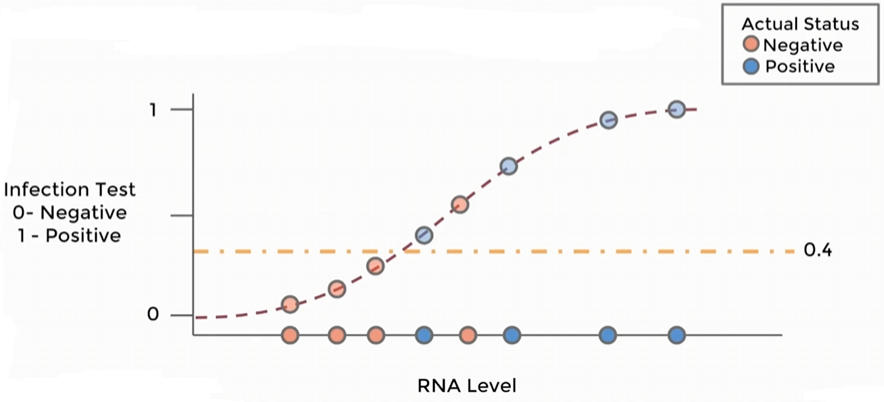

Теперь все синие точки классифицированы правильно, при этом пропало значение False Negative, но осталась точка False Positive. То есть когда мы понижаем пороговое значение мы можем уменьшить значение False Negative, но потенциально можем увеличить False Positive.

**Почему здесь обсуждается такой баланс?**

В некоторых задачах проще и дешевле согласиться на большее количество ложно-положительных случаев, сокращая ложно-отрицательные. Допустимо, что когда пациент здоров, но модель показала положительный результат - это не приятно, но лучше, чем пропустить больного человека, так как модель показала, что он здоров.

**False Negative во многих задачах более опасен, чем False Positive.**

Нанесём на график True Positive и False Positive для различных пороговых значений для ROC-кривой:

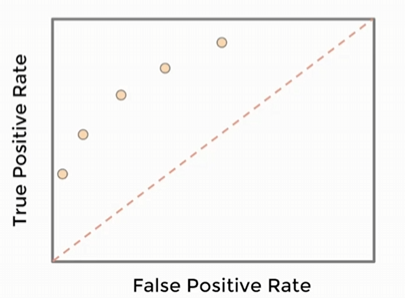

Меняя пороговое значение, можно регулировать True Positive и False Positive:

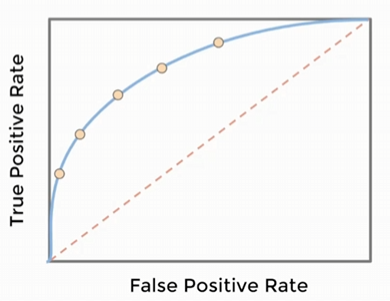

Идеальная модель будет иметь нулевой FPR. Здесь красная пунктирная линия - случайное угадывание.

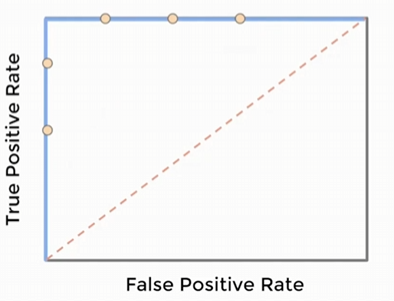

В прикладных задачах график будет иметь приблизительный вид:

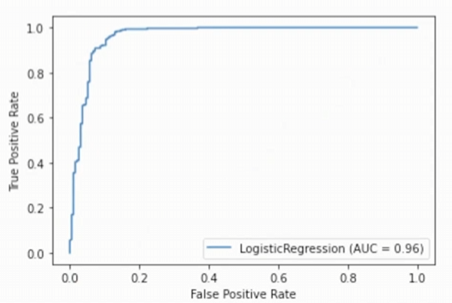

**Для сравнения двух таких графиков между собой, вычисляется площадь под графиком - AUC.**

Также, ещё можно построить график precision vs recall:

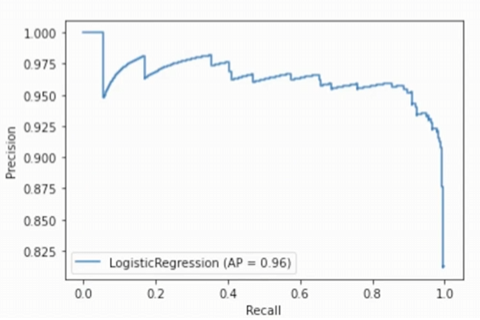